# Estymatory największej wiarygodności

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Przykład 
Program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [5]:
# Parametry rozkładu jednwostajnego
a, b = -2, 4  # zakładamy, że chcemy losować z przedziału [-2, 4]

# Parametry rozkładu normalnego
mu, sigma = 1, 1

# Liczba próbek
N = 10000

# Losowanie próbki z rozkładu jednostajnego
uniform_data = np.random.uniform(a, b, N)

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_16146/2314562786.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='Rozkład normalny ($\mu=1$, $\sigma=1$)')


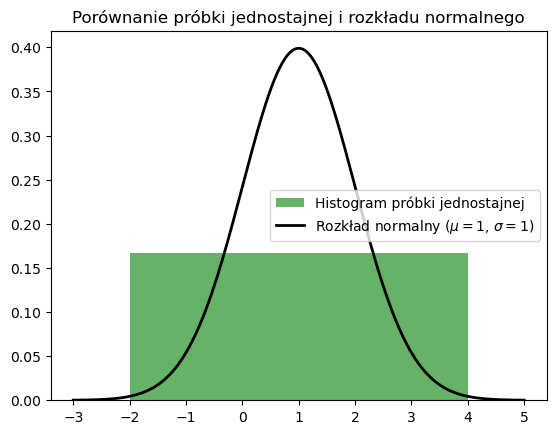

In [7]:
# Punkty, dla których będziemy rysować funkcję gęstości rozkładu normalnego
t = np.linspace(-3, 5, 1000)

# Rysowanie histogramu próbki z rozkładu jednostajnego
plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')

# Rysowanie funkcji gęstości rozkładu normalnego
plt.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='Rozkład normalny ($\mu=1$, $\sigma=1$)')

# Dodanie legendy i tytułu
plt.legend()
plt.title('Porównanie próbki jednostajnej i rozkładu normalnego')
plt.show()

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [159]:
a, b = -1, 1
N = 10_000
uniform_data = np.random.uniform(a, b, N)

mu = np.sum(uniform_data) / N
sigma = np.sum((uniform_data - mu) ** 2) / N
mu, sigma

(-0.003520488238472819, 0.3292371228927258)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_16146/1643944941.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, stats.norm.pdf(x, mu, sigma), 'b-', lw=2, label='Rozkład normalny ($\mu=1$, $\sigma=1$)')


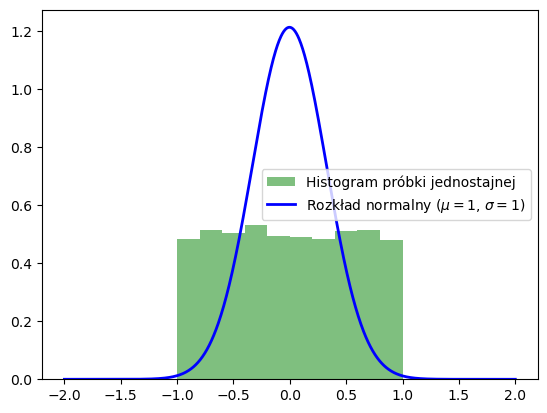

In [160]:
x = np.linspace(-2, 2, 1000)
plt.hist(uniform_data, density=True, color ='g', alpha=0.5, label='Histogram próbki jednostajnej')
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'b-', lw=2, label='Rozkład normalny ($\mu=1$, $\sigma=1$)')
plt.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

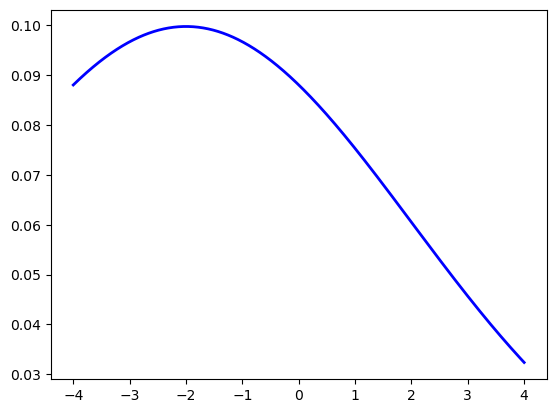

In [181]:
a, b = -2, 4
uniform_data = stats.uniform.rvs(a, b, size=10_000)
loc, scale = stats.uniform.fit(uniform_data)

x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x, loc, scale), 'b-', lw=2)
plt.show()

# Zadanie 3

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [162]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sigma**2))

In [163]:
uniform_data = np.random.uniform(0, 1, size=10_000)

mu = np.mean(uniform_data)  # np.sum(uniform_data) / N
sigma = np.std(uniform_data)  # np.sum((uniform_data - mu) ** 2) / N
mu, sigma

(0.5010475962504923, 0.2877049612133214)

In [184]:
def log_likelihood(data, mu, sigma):
    return np.sum(np.log(Gpdf(data, mu, sigma)))

log_likelihood(uniform_data, mu, sigma)

-159077.82444090888

# Zadanie 4
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [206]:
def log_likelihood(data, mu, sigma):
    return np.sum(np.log(Gpdf(data, mu, sigma)))

uniform_data = stats.uniform.rvs(0, 1, 10_000)

mu_list = [0, 0, 1, 0]
sigma_list = [1, 2, 1, 0.2]

res = []
for mu, sigma in zip(mu_list, sigma_list):
    res.append(((mu, sigma), log_likelihood(uniform_data, mu, sigma)))

print("max:", max(res, key=lambda x: x[1]))
res

max: ((0, 1), -10851.943373910206)


[((0, 1), -10851.943373910206),
 ((0, 2), -16536.49664811205),
 ((1, 1), -10860.389186176282),
 ((0, 0.2), -34658.95725429271)]

# Przykład
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [113]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 5
Zminimalizuj funkcję wiarygodności korzystając z optimize (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [219]:
def log_likelihood2(params, data):
    mu, sigma = params
    return -np.sum(np.log(Gpdf(data, mu, sigma)))


uniform_data = stats.uniform.rvs(-2, 4, 100)
x0 = np.asarray((1, 2)) # initial mu, sigma

res = optimize.fmin_cg(log_likelihood2, x0, args=(uniform_data,))
#res = minimize(log_likelihood2, x0, args=(uniform_data,), method='CG')  # method='L-BFGS-B'

res

Optimization terminated successfully.
         Current function value: 156.580975
         Iterations: 8
         Function evaluations: 60
         Gradient evaluations: 20


array([0.10178233, 1.15820481])

In [251]:
optimize.fmin_cg(lambda x: log_likelihood(uniform_data, x[0], x[1]), x0)

         Current function value: nan
         Iterations: 1
         Function evaluations: 448
         Gradient evaluations: 112


/tmp/ipykernel_16146/3488754936.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(Gpdf(data, mu, sigma)))
/opt/miniconda3/envs/env1/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/tmp/ipykernel_16146/3488754936.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(Gpdf(data, mu, sigma)))
/tmp/ipykernel_16146/3488754936.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(Gpdf(data, mu, sigma)))
/opt/miniconda3/envs/env1/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/tmp/ipykernel_16146/3488754936.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(Gpdf(data, mu, sigma)))
/tmp/ipykernel_16146/3488754936.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(np.log(Gpdf(data, mu, sigma)))
/opt/min

array([-342.36944758, -974.92061419,    1.01192298])

# Zadanie 6
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

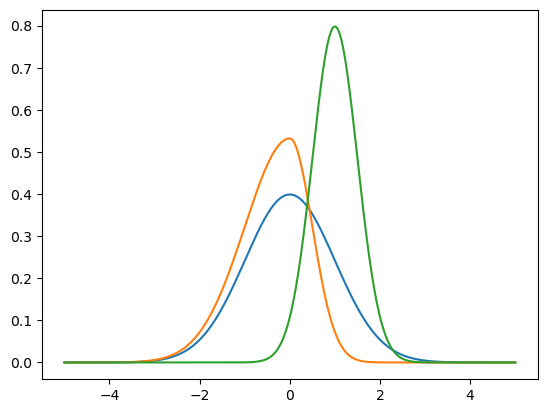

In [255]:
def split_Gaussian_pdf(x, m, sigma, tau):
    sigma_sqr = sigma ** 2
    tau_sqr = tau ** 2
    c = np.sqrt(2 / np.pi) / (sigma * (1 + tau))
    pdf = np.where(x <= m, c * np.exp(-0.5 * (x - m)**2 / sigma_sqr), c * np.exp(-0.5 * (x - m)**2 / (tau_sqr * sigma_sqr)))
    return pdf

x = np.linspace(-5, 5, 1000)
params = [
    (0, 1, 1),
    (0, 1, 0.5),
    (1, 0.5, 1)
]

for i in range(len(params)):
    mu, sigma, tau = params[i]
    pdf = split_Gaussian_pdf(x, mu, sigma, tau)
    plt.plot(x,pdf)

# Zadanie 7

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [231]:
def log_likelihood_split_gaussian(data, mu, sigma, tau):
    return -np.sum(np.log(split_Gaussian_pdf(data, mu, sigma, tau)))

data = stats.norm.rvs(0, 1, 100)
log_likelihood_split_gaussian(data, 1, 1, 1)

188.44621353439456

# Zadanie 8
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [257]:
data = stats.norm.rvs(0, 1, 100)
x0 = np.asarray((1, 1, 1)) # initial mu, sigma

result = optimize.fmin_cg(lambda x: log_likelihood_split_gaussian(data, x[0], x[1], x[2]), x0)
print(result)

         Current function value: 153.266574
         Iterations: 1
         Function evaluations: 55
         Gradient evaluations: 12
[0.33591707 1.70305333 0.70877866]


/tmp/ipykernel_16146/3235247319.py:2: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(split_Gaussian_pdf(data, mu, sigma, tau)))
/tmp/ipykernel_16146/3235247319.py:2: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(split_Gaussian_pdf(data, mu, sigma, tau)))
/tmp/ipykernel_16146/3235247319.py:2: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(split_Gaussian_pdf(data, mu, sigma, tau)))
/opt/miniconda3/envs/env1/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


# Zadanie 9
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>california_housing.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [155]:
from sklearn import datasets
california_housing = datasets.fetch_california_housing()
data=california_housing.data[:,7]

In [267]:
x = np.linspace(-5, 5, 1000)

mu=np.mean(data)
sigma=np.std(data)
tau=np.std(data)

x0 = np.asarray((mu, sigma, tau))

result_split_gaussian = optimize.fmin_cg(lambda x: log_likelihood_split_gaussian(data, x[0], x[1], x[2]), x0)
result_gaussian = optimize.fmin_cg(lambda x: log_likelihood(data, x[0], x[1]), x0)

print(result_split_gaussian, result_gaussian)
y1 = log_likelihood_split_gaussian(data, *result_split_gaussian)
y2 = log_likelihood(data, *result_gaussian[:2])
y1, y2

Optimization terminated successfully.
         Current function value: 141.738288
         Iterations: 18
         Function evaluations: 139
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: -142.028836
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1
[0.14336219 1.12173956 0.78017346] [-0.05612349  1.00135073  1.00135073]


/tmp/ipykernel_16146/3235247319.py:2: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(split_Gaussian_pdf(data, mu, sigma, tau)))
/opt/miniconda3/envs/env1/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


(141.7382882635472, -142.0288356298802)